In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Identifying the communities that will have the most difficulty obtaining a vaccine and evaluating the effectiveness of the public vaccination program based on different factors for communities in South Africa.

Potential factors to look at:
- Vaccination Effectiveness and Efficiency per District
- Population Demographics (Age) per District

## Datasets:
- South African Municipal Boundaries (2018) --> contain shapefiles of municipalities and districts
- Hospital / Helth Facilities Information Per District
- Covid19 Public Vaccination Sites 
- Covid19 Vaccination Statistics Per Province
- South Africa Population Demographics (Age)

In [2]:
# Load the datasets used 

sa_hospitals = gpd.read_file('../../data/cleaned/sa_district_hospitals_population.json')
print(sa_hospitals.shape)
sa_hospitals.sample(n=5)

(52, 11)


,OBJECTID,PROVINCE,DISTRICT,DISTRICT.1,District_Name,Population,No. Public clinics,No. Public Hospitals,No. Private Clinics,No. Private Hospital,geometry
35,36,MP,DC31,Nkangala,Nkangala District Municipality DC31,1562174,79,9,19,12,"POLYGON ((29.36271 -25.40719, 29.36306 -25.407..."
13,14,FS,DC20,Fezile Dabi,Fezile Dabi District Municipality DC20,507519,39,5,5,4,"POLYGON ((27.31662 -26.85275, 27.31724 -26.852..."
46,47,WC,CPT,City of Cape Town,City of Cape Town District Municipality CPT,4194179,92,28,241,44,"MULTIPOLYGON (((18.52416 -33.52523, 18.52422 -..."
37,38,NC,DC45,John Taolo Gaetsewe,John Taolo Gaetsewe District Municipality DC45,246471,39,2,1,2,"POLYGON ((23.05767 -27.88156, 23.05725 -27.881..."
45,46,NW,DC40,Dr Kenneth Kaunda,Dr Kenneth Kaunda District Municipality DC40,772321,31,4,10,8,"POLYGON ((26.06420 -26.85444, 26.06553 -26.857..."


In [3]:

v_sites = gpd.read_file('../../data/cleaned/sites_with_districts.json')
print(v_sites.shape)
v_sites.sample(n=5)

(1026, 16)


,Unnamed: 0,District,Sub-District,Vaccination Site Name,Type of site,Pfizer or J&J,Start Date,Site Active (Yes/No),Open Days per week,Capacity per day,Latitude,Longitude,Municipality,DISTRICT_N,DISTRICT_C,geometry
797,56,King Cetshwayo DM,Mthonjaneni LM,KwaMagwaza Hospital,Temporary Outreach Site,Pfizer,6/28/2021,Yes,7 days,50,NaN,NaN,Mthonjaneni,King Cetshwayo,DC28,None
611,108,West rand District,Rand West City LM,Mining house,fixed outreach site,Pfizer,17/05/2021,Yes,5 days,80,-26.13830,27.58702,Rand West City,West Rand,DC48,POINT (27.58702 -26.13830)
419,190,Overberg,Overstrand Municipality,Hawston Thusong Hall,Temporary outreach site,Pfizer,2021-06-04 00:00:00,Yes,2 days,100,-34.41700,19.33300,Overstrand,Overberg,DC3,POINT (19.33300 -34.41700)
652,1,Francis Baard,Sol Plaatjie,GALESHEWE DAY HOSPITAL,PRIMARY VACCINATION SITE,Pfizer,6/9/2021,Yes,5 days,200,-28.71896,24.73785,None,Frances Baard,DC9,POINT (24.73785 -28.71896)
250,21,Cape Town MM,CT Western SD,CTICC Vaccination Centre of Hope,Fixed Outreach site,Pfizer,2021-07-07 00:00:00,yes,5 days,4000,-34.10240,18.82722,None,City of Cape Town,CPT,POINT (18.82722 -34.10240)


In [4]:
pop_stat = pd.read_csv('../../data/cleaned/sa_district_popdem.csv')
print(pop_stat.shape)
print(pop_stat.columns)
pop_stat.sample(n=5)

(52, 62)
Index(['Unnamed: 0', 'ADM1_NAME', 'ADM1_PCODE', 'ADM2_NAME', 'ADM2_PCODE',
       'YEAR', 'F_TL', 'M_TL', 'T_TL', 'F_00_04', 'F_05_09', 'F_10_14',
       'F_15_19', 'F_20_24', 'F_25_29', 'F_30_34', 'F_35_39', 'F_40_44',
       'F_45_49', 'F_50_54', 'F_55_59', 'F_60_64', 'F_65_69', 'F_70_74',
       'F_75_79', 'F_80PLUS', 'M_00_04', 'M_05_09', 'M_10_14', 'M_15_19',
       'M_20_24', 'M_25_29', 'M_30_34', 'M_35_39', 'M_40_44', 'M_45_49',
       'M_50_54', 'M_55_59', 'M_60_64', 'M_65_69', 'M_70_74', 'M_75_79',
       'M_80PLUS', 'T_00_04', 'T_05_09', 'T_10_14', 'T_15_19', 'T_20_24',
       'T_25_29', 'T_30_34', 'T_35_39', 'T_40_44', 'T_45_49', 'T_50_54',
       'T_55_59', 'T_60_64', 'T_65_69', 'T_70_74', 'T_75_79', 'T_80PLUS',
       'DISTRICT_NAME', 'DISTRICT_CODE'],
      dtype='object')


,Unnamed: 0,ADM1_NAME,ADM1_PCODE,ADM2_NAME,ADM2_PCODE,YEAR,F_TL,M_TL,T_TL,F_00_04,...,T_45_49,T_50_54,T_55_59,T_60_64,T_65_69,T_70_74,T_75_79,T_80PLUS,DISTRICT_NAME,DISTRICT_CODE
10,10,FREE STATE,ZA4,MANGAUNG,ZA494,2020.0,421460.0,405161.0,826621.0,36492.0,...,42924.0,35692.0,30625.0,26650.0,20814.0,14083.0,9395.0,6853.0,Mangaung,MAN
29,29,LIMPOPO,ZA9,CAPRICORN,ZA935,2020.0,683806.0,611850.0,1295656.0,69289.0,...,57492.0,45977.0,42611.0,39693.0,33751.0,26709.0,17096.0,16562.0,Capricorn,DC35
11,11,FREE STATE,ZA4,THABO MOFUTSANYANE,ZA419,2020.0,351109.0,311720.0,662829.0,33163.0,...,31914.0,27021.0,25167.0,21863.0,16863.0,11362.0,7889.0,5899.0,Thabo Mofutsanyane,DC19
47,47,WESTERN CAPE,ZA1,CENTRAL KAROO,ZA105,2020.0,38952.0,38630.0,77582.0,3531.0,...,4606.0,4041.0,3475.0,2984.0,2353.0,1623.0,980.0,646.0,Central Karoo,DC5
50,50,WESTERN CAPE,ZA1,OVERBERG,ZA103,2020.0,148367.0,155090.0,303457.0,11379.0,...,17956.0,14989.0,13016.0,13737.0,12450.0,8642.0,5461.0,3642.0,Overberg,DC3


Information from the above data sets can be merged and grouped by district
This has already been done in another notebook (collective_analysis_per_district.ipynb)

(52, 16)
Index(['DISTRICT', 'Population', 'DISTRICT_CODE', 'DISTRICT_NAME', 'T_TL',
       'T_60PLUS', 'percent60PLUS', 'Sites', 'Province', 'P_Density',
       'Capacity per day', 'Open Days per week', 'Effective Weekly Rate',
       'fully vaccinated rate', 'Effective Weekly Rate Full', 'geometry'],
      dtype='object')


,DISTRICT,Population,DISTRICT_CODE,DISTRICT_NAME,T_TL,T_60PLUS,percent60PLUS,Sites,Province,P_Density,Capacity per day,Open Days per week,Effective Weekly Rate,fully vaccinated rate,Effective Weekly Rate Full,geometry
41,DC9,381624,DC9,Frances Baard,420580.0,41235.0,0.098043,29.0,NC,32.344537,4300.0,5.000,21500.0,2750.0,13750.0,"POLYGON ((24.89891 -28.43163, 24.89835 -28.433..."
20,DC23,767597,DC23,Uthukela,652282.0,55401.0,0.084934,5.0,KZN,58.284525,1050.0,7.000,7350.0,525.0,3675.0,"POLYGON ((30.26818 -28.73107, 30.27516 -28.731..."
45,DC40,772321,DC40,Dr Kenneth Kaunda,754431.0,73886.0,0.097936,12.0,NW,51.390115,2400.0,6.000,14400.0,1200.0,7200.0,"POLYGON ((26.06420 -26.85444, 26.06553 -26.857..."
10,DC16,155470,DC16,Xhariep,105759.0,11572.0,0.109419,NaN,FS,3.087140,NaN,NaN,NaN,NaN,NaN,"POLYGON ((26.52462 -29.57265, 26.52621 -29.572..."
29,DC33,1238400,DC33,Mopani,1062666.0,97171.0,0.091441,16.0,LIM,52.639040,4400.0,4.875,21450.0,2200.0,10725.0,"POLYGON ((31.06501 -24.09170, 31.06622 -24.091..."


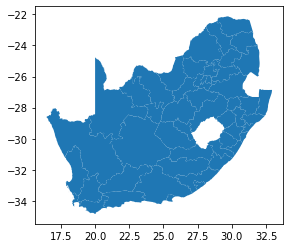

In [5]:
# Load the merged data 

combined = gpd.read_file('../../data/cleaned/combined_vaccination_rate.json')
print(combined.shape)
print(combined.columns)
combined.plot()
combined.sample(n=5)

In [28]:
provincial_vaccination_estimates = pd.read_excel('../../data/cleaned/current_vaccination_estimates_provincial.xlsx')
provincial_vaccination_estimates

,Province,Estimated Weekly Rate
0,GT,230543.25
1,EC,135963.75
2,FS,50941.00
3,KZN,158772.25
4,LIM,101931.75
5,MP,45994.50
6,NC,20515.50
7,NW,50035.00
8,WC,148196.00


# Questions that can be answered by these datasets:
- How many vaccination sites are there in each district? 
- What are the vaccination capacities (how many people that can be vaccinated) for each district per day?
- Does the data show that there are communities that have unmet capacity?
- What does the current vaccination rate per district look Like in comparison to the theoretical?
- Based on the percentage of people over the age of 60, which districts (communities) need to be prioritiesed? Have they been prioritised?
- What is the projected timline that each district will be sufficiently vaccinated?

<AxesSubplot:title={'center':'Number of Vaccination Sites'}>

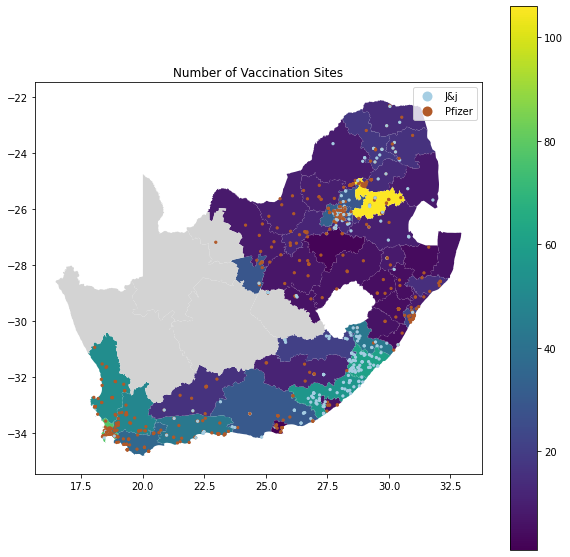

In [10]:
# How many vaccination sites are there in each district?

_ , ax = plt.subplots(figsize=(10,10))

ax.set_title("Number of Vaccination Sites")



v_sites['Pfizer or J&J'] = v_sites['Pfizer or J&J'].str.capitalize()

combined.plot(column='Sites', legend=True, ax=ax, missing_kwds={"color":"lightgrey", "label": "No data"})
v_sites.plot(ax=ax, column='Pfizer or J&J', markersize=5, cmap='Paired', legend=True)


This figure shows as expected that there are certain districts that have more vaccination sites than others.
An nother interesting insight is that in the Eastern Cape a majority of the sites offer the J&J vaccine. This means that the communities in this Province and District only require visiting a vaccination site once as the J&J vaccine is a single dose compared to the two dose Pfizer Vaccine.

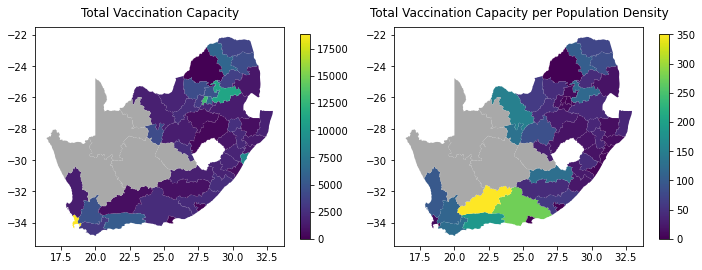

In [27]:
# What is the vaccination capacity per district?
# We can look at the capacity as well as the capacity per population density.

fig , capacity_ax = plt.subplots(ncols=2, figsize = (10, 6))
# On first axis plot Total Capacity:

combined.plot(column='Capacity per day', ax=capacity_ax[0], legend=True, missing_kwds={"color":"darkgrey", "label": "No data"}, legend_kwds={'shrink': 0.5})
capacity_ax[0].set_title('Total Vaccination Capacity', pad=10)

# On second axis plot Total Capacity per Population Density (Num. People / km2)

capacity_per_density = combined
capacity_per_density['C_per_D'] = capacity_per_density['Capacity per day'] / capacity_per_density['P_Density'] 
capacity_per_density.plot(column='C_per_D', ax=capacity_ax[1], legend=True, missing_kwds={"color":"darkgrey", "label": "No data"}, legend_kwds={'shrink': 0.5})
capacity_ax[1].set_title('Total Vaccination Capacity per Population Density', pad=10)
fig.tight_layout()

plt.show()


By comparing these new figures to the previous one. It can be seen that the number of sites do not directly speak about the vaccination capacity of the district, this could be due to there being many sites with that serve a low capacity.
This is clear by comparing the capacity of the districts in the Eastern Cape (South East) with the number of Sites.

It appears that the vaccination capacity has been adjusted based on the population density of the region. The vaccination capacity allone may suggest that the Cape Town District (Yellow Tip in the figure on the bottom left) has a surplus of capacity, however when the population density is considered the persepective is reversed.

In [44]:
# What does the current vaccination rate per district look Like in comparison to the theoretical?

# The current vaccinaton statistics are at a provincial level

combined_province = combined.dissolve(by='Province', aggfunc='sum')
combined_province['Effective Weekly Rate']

Province
EC      58400.000000
FS      23145.657143
GT     147394.545455
KZN    132436.702899
LIM     89059.523810
MP      54270.857143
NC      21500.000000
NW      61680.000000
WC     144723.992359
Name: Effective Weekly Rate, dtype: float64

In [49]:

#combined_province = combined_province.merge(provincial_vaccination_estimates, left_index=True, right_on='Province')


In [55]:
combined_province[['Effective Weekly Rate', 'Estimated Weekly Rate', 'Province']]

,Effective Weekly Rate,Estimated Weekly Rate,Province
1,58400.000000,135963.75,EC
2,23145.657143,50941.00,FS
0,147394.545455,230543.25,GT
3,132436.702899,158772.25,KZN
4,89059.523810,101931.75,LIM
5,54270.857143,45994.50,MP
6,21500.000000,20515.50,NC
7,61680.000000,50035.00,NW
8,144723.992359,148196.00,WC


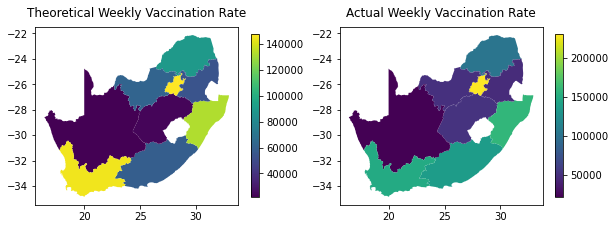

In [54]:
fig , weekly_ax = plt.subplots(ncols=2, figsize = (10, 6))
# On first axis plot Theoretical vaccination rate:

combined_province.plot(column='Effective Weekly Rate', ax=weekly_ax[0], legend=True, missing_kwds={"color":"darkgrey", "label": "No data"}, legend_kwds={'shrink': 0.5})
weekly_ax[0].set_title('Theoretical Weekly Vaccination Rate', pad=10)

# On second axis plot actual vaccination rate

combined_province.plot(column='Estimated Weekly Rate', ax=weekly_ax[1], legend=True, missing_kwds={"color":"darkgrey", "label": "No data"}, legend_kwds={'shrink': 0.5})
weekly_ax[1].set_title('Actual Weekly Vaccination Rate', pad=10)

plt.show()

It appears that actual weekly vaccinaton rates are supassing those of the Theoretical, for some provinces. This could be due to in an inaccurate recording of the capacity and due the lack of data from private vaccination sites such as Dischem and Clicks. The actual weekly vaccinatino rate of the Eastern Cape is supprisingly high compared to the theoretical. As was disscussed before the Eastern Cape has many sites. The thoretical data suggested that the average capacity for these sites where relatively low, however the actual mesured data suggests that these sites might be serving to a greater capacity.

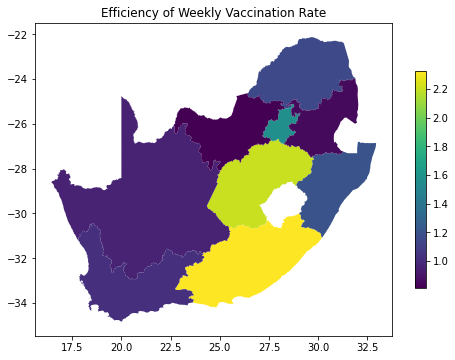

In [57]:
# The deviation from the theoretical results is better highlighted with an 'efficiency'
# metric. This is calculated as Actual / Theortical

combined_province['efficiency'] = combined_province['Estimated Weekly Rate'] / combined_province['Effective Weekly Rate']

_, ax_efficiency = plt.subplots(figsize=(8,8))

combined_province.plot(column='efficiency',  ax=ax_efficiency, legend=True, missing_kwds={"color":"darkgrey", "label": "No data"}, legend_kwds={'shrink': 0.5})
ax_efficiency.set_title('Efficiency of Weekly Vaccination Rate')

plt.show()


This shows that most provinces are meeting their expected weekly vaccination rate , ,if not lower. These provinces are: Western Cape, Northern Cape, North West, Mpumalanga, Limpopo, and KwaZulu Natal. However there are provinces that are achievig more than double their expected weekly vaccination rate, namely: Free State and Eastern Cape.

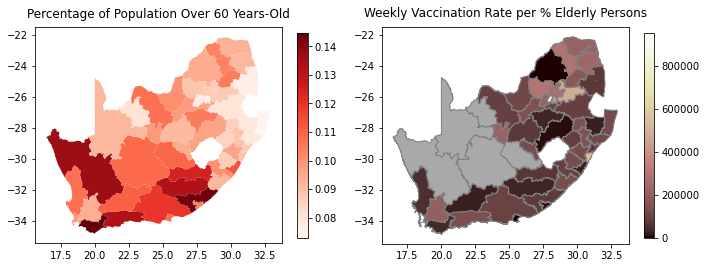

In [66]:
# Based on the percentage of people over the age of 60, 
# which districts (communities) need to be prioritiesed? Have they been prioritised?

fig , age_ax = plt.subplots(ncols=2, figsize = (10, 6))
# On first axis

combined.plot(column='percent60PLUS', ax=age_ax[0], cmap='Reds', legend=True, missing_kwds={"color":"darkgrey", "label": "No data"}, legend_kwds={'shrink': 0.5})
age_ax[0].set_title('Percentage of Population Over 60 Years-Old', pad=10)

# On second axis 

combined['capacity_per_p60'] =  combined['Effective Weekly Rate'] / combined['percent60PLUS']


combined.plot(column='capacity_per_p60', edgecolor='gray', ax=age_ax[1], legend=True, cmap="pink" ,  missing_kwds={"color":"darkgrey", "label": "No data"}, legend_kwds={'shrink': 0.5})
age_ax[1].set_title('Weekly Vaccination Rate per % Elderly Persons', pad=10)
fig.tight_layout()
plt.show()


The figure on the left shows that Districts in Southern part of South Africa Have a geater percentage of elderly in their population. This is true for most notably Districts in the Eastern Cape and Southern Western Cape. 

The figure on the right shows that there tends to be better vaccaination capacities where there are higher percentages of elderly people. However Districts like Overberg in the Western Cape and Waterberg seem to fall behind in accomadating the elderly populations relative to other populations.

In [75]:
# What is the projected timline that each 
# district will be sufficiently vaccinated?

# To simplify this predicton we will extrapolate current vacination rate
# as well as a therotical one that considers the number of doses
# We will predict when 70% of the genral population is fully vaccinated

# The percentage of single dose vaccines is around 11/43 ~ 25.6% and rest 2 doses


single_dose_distribution = 0.256
double_dose_distribution = 1-single_dose_distribution


combined_province['current_projection'] = ((combined_province['T_TL'] * (single_dose_distribution + (2*double_dose_distribution)) * 0.7) / combined_province['Estimated Weekly Rate']) - 12

combined['projection'] = (combined['Population'] / combined['Effective Weekly Rate Full']) - 12



In [81]:
import numpy as np

combined['projection'] = (combined['Population'] / combined['Effective Weekly Rate Full']) - 12
combined['projection']

combined.replace([np.inf, -np.inf], np.nan, inplace=True)

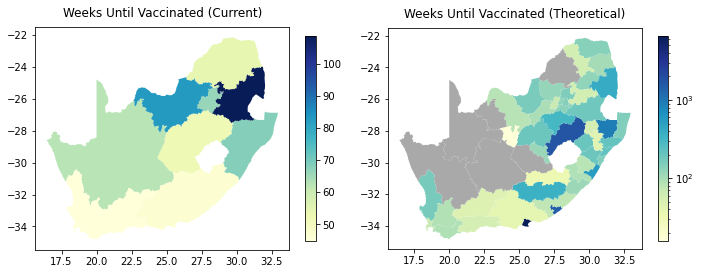

In [83]:
from matplotlib.colors import LogNorm
fig , projection_ax = plt.subplots(ncols=2, figsize = (10, 6))
# On first axis

combined_province.plot(column='current_projection', ax=projection_ax[0], cmap='YlGnBu', legend=True, missing_kwds={"color":"darkgrey", "label": "No data"}, legend_kwds={'shrink': 0.5})
projection_ax[0].set_title('Weeks Until Vaccinated (Current)', pad=10)

# On second axis 

combined.plot(column='projection', ax=projection_ax[1], legend=True, cmap="YlGnBu", norm=LogNorm(vmin=combined['projection'].min(), vmax=combined['projection'].max()) ,  missing_kwds={"color":"darkgrey", "label": "No data"}, legend_kwds={'shrink': 0.5})
projection_ax[1].set_title('Weeks Until Vaccinated (Theoretical)', pad=10)
fig.tight_layout()
plt.show()

The is insufficent data to accurately determine when 70% of people will be fully vaccinated, however these figures do highlight that The Northen and Eastern Parts of South Africa will need to icrease thier vaccination capacities.


# Disscussion & Conclusions

The data suggests that Estern Cape districts were priorities regarding vaccination. This is evident as the single dose vaccine is the main choice of vaccine in the Eastern Cape. This could be due to reduce the difficulty on the people in these regions to get vaccinated. This region also has a higher percentage of elderly compared to the rest of South Africa, hence the descisons made by the organizers of the public vaccination program seem to be justified by the data. The data shows that areas that might not have been prioritised as vulnerable seem to be on the lower end of vaccination capacity. These districts include Overberg WC, Waterberg LMP, Thabo Mofutsanyane FS, and Nelson Mandela Bay EC. 

Other areas that may experience difficultie, based on this data, are those that are densly populated. 
This would possibly be due to bottlenecks in program due to the large demand in such a small area. These regions are: Johannesburg and Cape Town. Although it is important to note that the datastes included in this analysis does not include the support from the private sector in the vaccination program. It is evident that this there are additional vaccionation capacities esspecially in the Johannesburg / Gauteng region. Hence these regions should not be classified the same as the other ones identified.

From the data available the difficulty that people may face in obtaining a COVID19 vaccine is partially identifiable. With more datasets such as those including infrastructure and mortality rates both the diffulty of obtaining a COVID19 vaccine as well as evaluating the effectivness of the public vaccination program can be performed to a more enriched level.
